In [1]:
import pandas as pd
import numpy as np

import json

from scripts.utils import SimulateData
from stopsignalmetrics.ssrtmodel import SSRTmodel

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

# SSRT by SSD

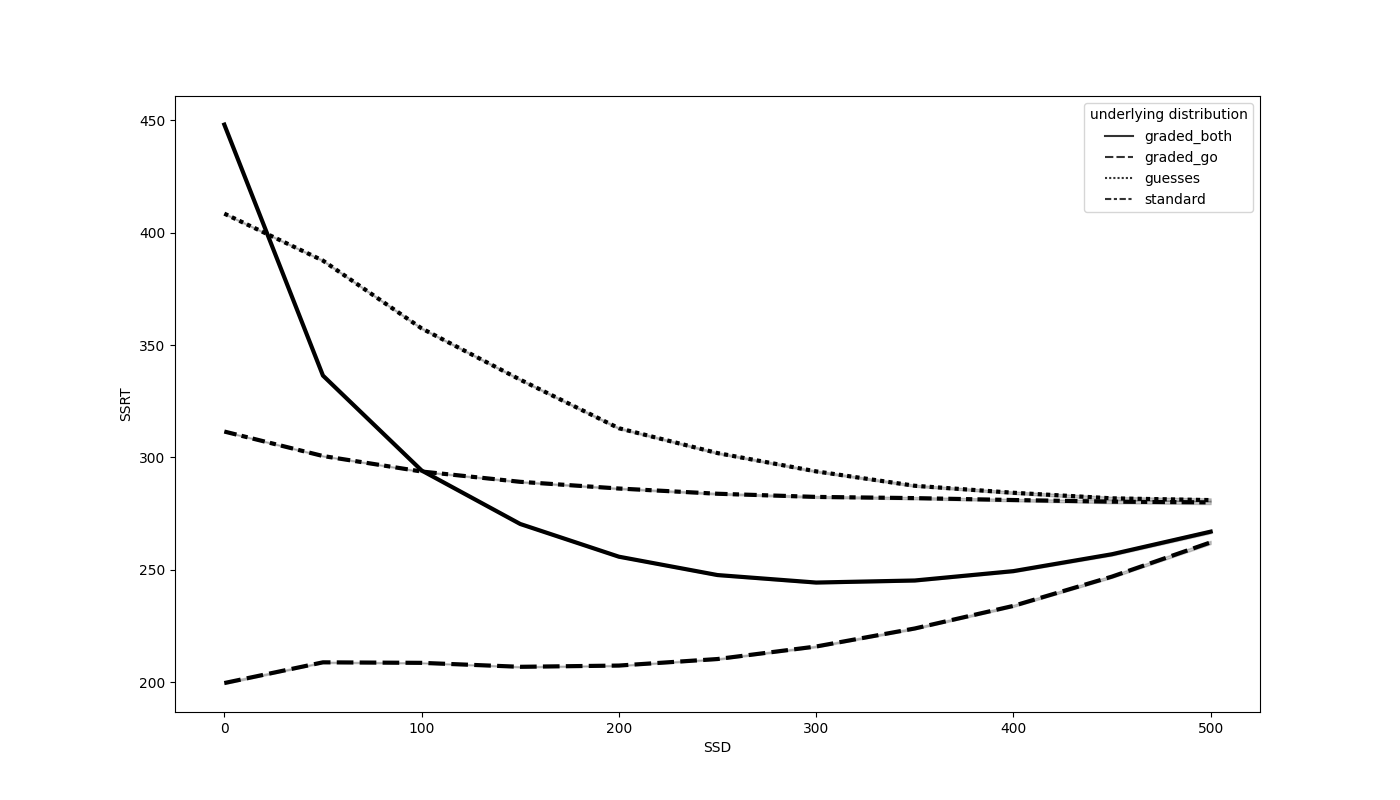

In [2]:
Image('figures/SSRT_by_SSD.png')

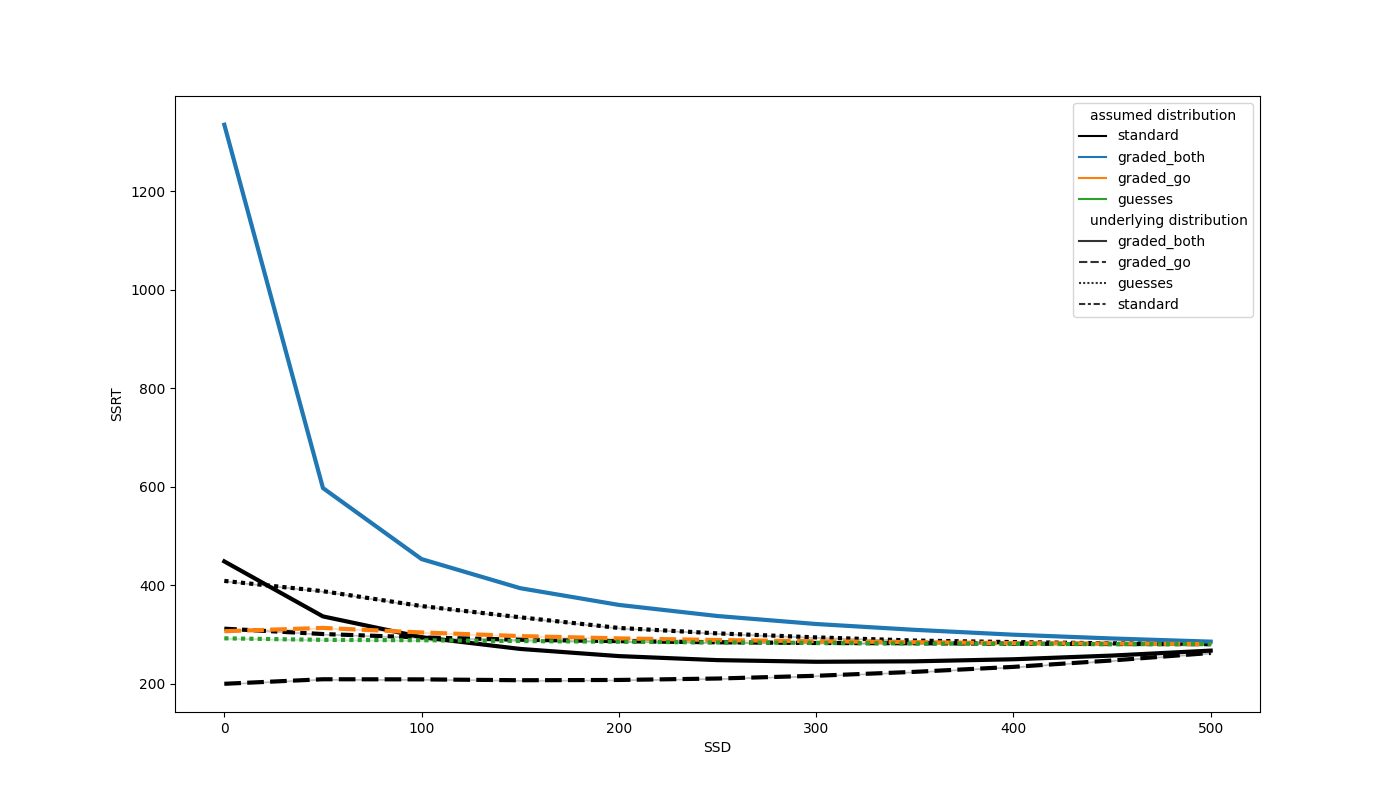

In [3]:
Image('figures/SSRT_by_SSD_supplement.png')

# Inhibition Function

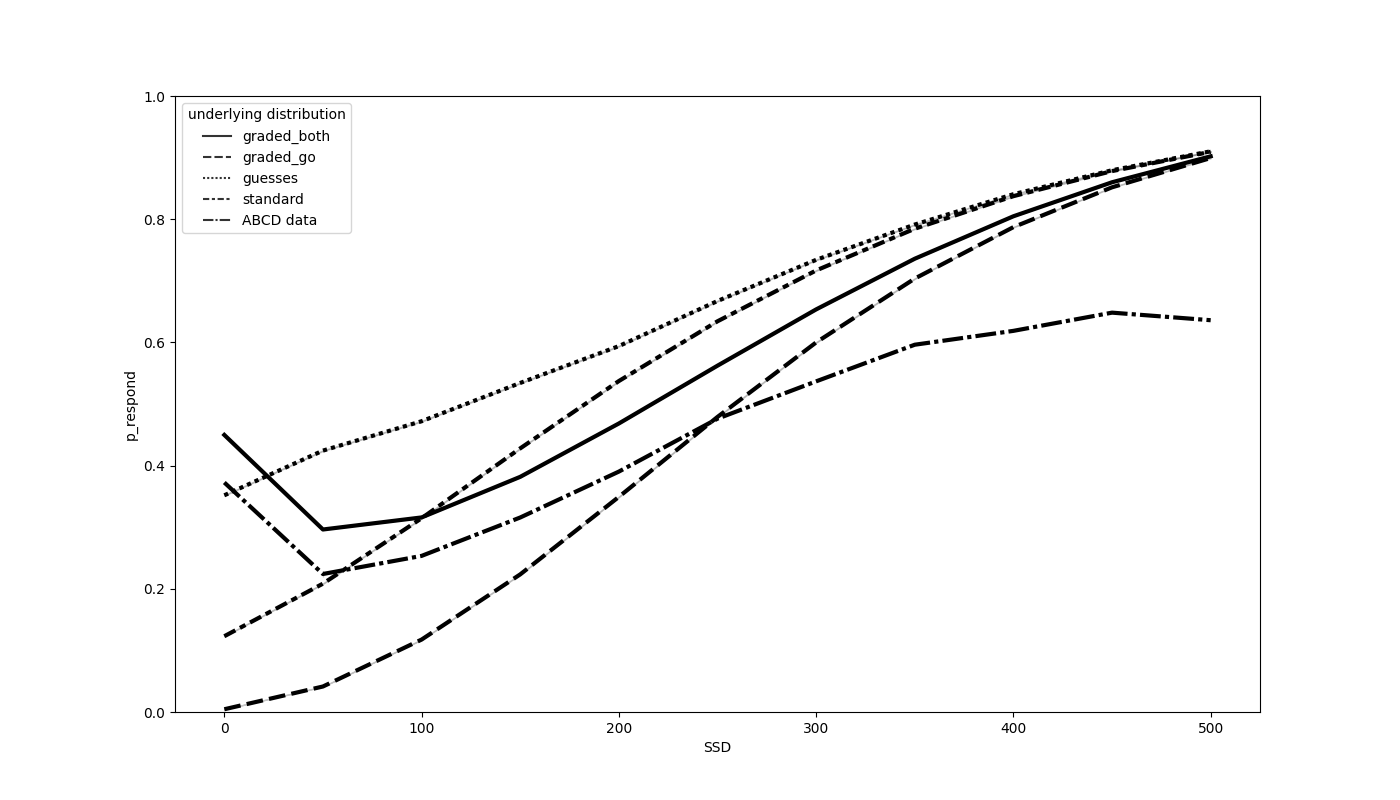

In [4]:
Image('figures/inhibition_function.png')

# Individual Differences

In [5]:
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [6]:
df = pd.read_csv('ssrt_metrics/expected_ssrts.csv', index_col=0)

# reformatting - was multiindex
df.columns = [ f'gen-{gen}_SSRT-{ssrt}' for gen, ssrt in zip(df.loc['underlying distribution', :].values, df.columns)]
df = df.drop(['underlying distribution', 'NARGUID'])

for col in df.columns:
    df[col] = df[col].astype(float)


In [7]:
sim_rt_info = pd.read_csv('simulated_data/sim_rt_meanStd.csv', index_col = 0)

In [8]:
# getting expect SSRTs
mus_path = 'abcd_data/assigned_mus.json'
with open(mus_path, 'r') as f:
    mus_dict = json.load(f)
    
mus_df = pd.DataFrame(mus_dict).T

In [9]:
mus_df.head()

,goRT,go,SSRT,stop
003RTV85,545.743782,0.201717,301.339962,0.397867
007W6H7B,545.743782,0.201717,301.339962,0.397867
00CY2MDM,545.743782,0.201717,301.339962,0.397867
00HEV6HB,545.743782,0.201717,301.339962,0.397867
00J52GPG,545.743782,0.201717,301.339962,0.397867


In [10]:
monster_df = pd.concat([mus_df.add_prefix('assigned_'), sim_rt_info, df], 1, sort=True)
monster_df.columns = [col.split('.')[0] for col in monster_df.columns]
monster_df = monster_df.loc[monster_df['gen-standard_SSRT-fixed'].notnull()]

In [11]:
monster_df

,assigned_goRT,assigned_go,assigned_SSRT,assigned_stop,sim_rt_mean,sim_rt_std,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard,gen-guesses_SSRT-standard,gen-standard_SSRT-standard,...,gen-guesses_SSRT-graded_both,gen-standard_SSRT-graded_both,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed,gen-guesses_SSRT-fixed,gen-standard_SSRT-fixed,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking,gen-guesses_SSRT-tracking,gen-standard_SSRT-tracking
00J52GPG,545.743782,0.201717,301.339962,0.397867,537.5210,216.061634,372.000000,206.750000,385.016667,305.066667,...,822.233333,572.500000,283.0,210.0,339.0,284.0,262.464,208.812,340.132,276.510
00LJVZK2,545.743782,0.201717,301.339962,0.397867,512.0010,196.643602,303.811321,216.811321,338.528302,291.716981,...,597.792453,453.207547,276.0,217.0,334.0,283.0,254.326,205.408,341.296,288.788
00R4TXET,545.743782,0.201717,301.339962,0.397867,529.3815,207.965889,265.566667,210.633333,313.283333,284.283333,...,478.416667,413.983333,279.0,213.0,333.0,285.0,257.340,203.802,346.788,281.488
028WCTG6,545.743782,0.201717,301.339962,0.397867,544.3005,218.878764,269.216667,212.200000,321.816667,287.250000,...,473.516667,411.716667,285.0,217.0,335.0,289.0,257.268,209.070,339.060,283.424
029PWCFY,545.743782,0.201717,301.339962,0.397867,516.4205,196.747987,290.650000,207.883333,332.150000,293.583333,...,556.650000,447.750000,281.0,217.0,329.0,291.0,253.868,215.674,346.922,281.176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZUXHPX3N,545.743782,0.201717,301.339962,0.397867,481.6645,182.295748,247.400000,225.133333,296.250000,280.383333,...,386.850000,363.016667,284.0,219.0,338.0,295.0,259.850,205.966,341.774,284.406
ZWWDT1TG,545.743782,0.201717,301.339962,0.397867,620.1270,271.202340,248.464286,219.964286,299.285714,280.178571,...,390.589286,365.160714,279.0,216.0,336.0,286.0,255.198,207.554,336.440,280.336
ZXF5C635,545.743782,0.201717,301.339962,0.397867,466.2770,167.058153,253.533333,209.200000,299.133333,281.683333,...,392.100000,375.350000,284.0,217.0,341.0,282.0,259.634,204.070,347.764,278.874
ZXPAWB32,545.743782,0.201717,301.339962,0.397867,460.1125,169.012844,263.551724,240.965517,289.568966,277.275862,...,358.534483,340.775862,290.0,218.0,337.0,290.0,255.078,204.296,341.114,279.662


In [12]:
def make_plot_square(ax):
    lowx, highx = ax.get_xlim()
    lowy, highy = ax.get_ylim()
    low = min(lowx, lowy)
    high = max(highx, highy)
    ax.set_xlim((low, high))
    ax.set_ylim((low, high))
    return ax

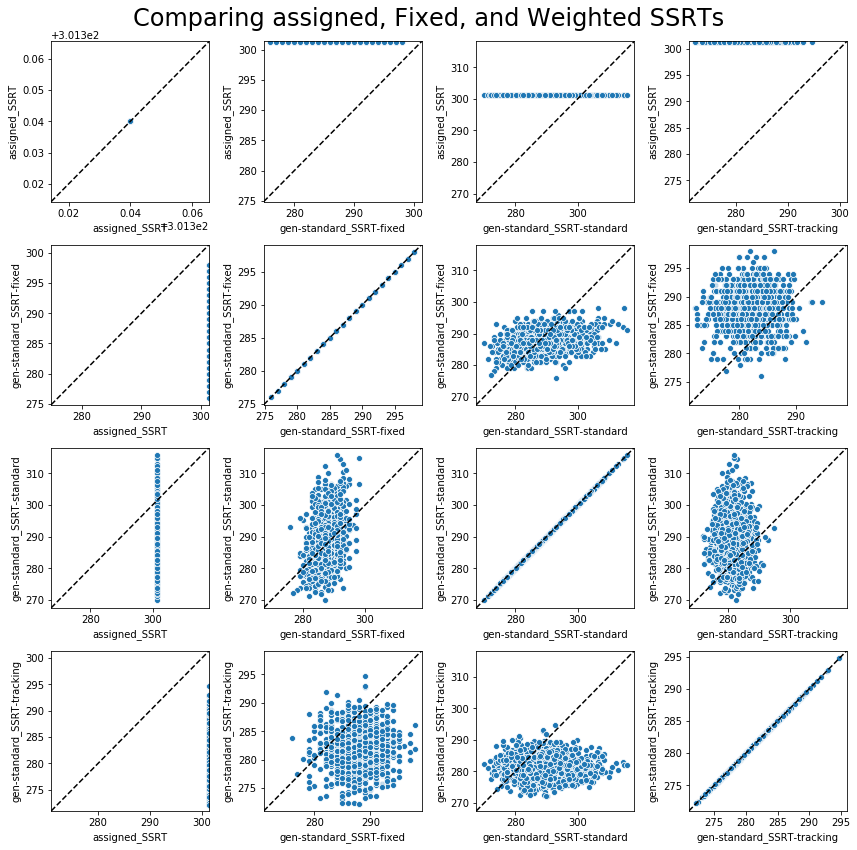

In [13]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

columns = ['assigned_SSRT', 'gen-standard_SSRT-fixed', 'gen-standard_SSRT-standard', 'gen-standard_SSRT-tracking']
for idx,coli in enumerate(columns):
    for jdx, colj in enumerate(columns):
        ax = sns.scatterplot(x=colj, y=coli, data=monster_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing assigned, Fixed, and Weighted SSRTs', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [14]:
monster_df[columns].corr(method='spearman')

,assigned_SSRT,gen-standard_SSRT-fixed,gen-standard_SSRT-standard,gen-standard_SSRT-tracking
assigned_SSRT,NaN,NaN,NaN,NaN
gen-standard_SSRT-fixed,NaN,1.000000,0.354553,0.013123
gen-standard_SSRT-standard,NaN,0.354553,1.000000,0.021848
gen-standard_SSRT-tracking,NaN,0.013123,0.021848,1.000000


# Comparing Fixed SSRTs

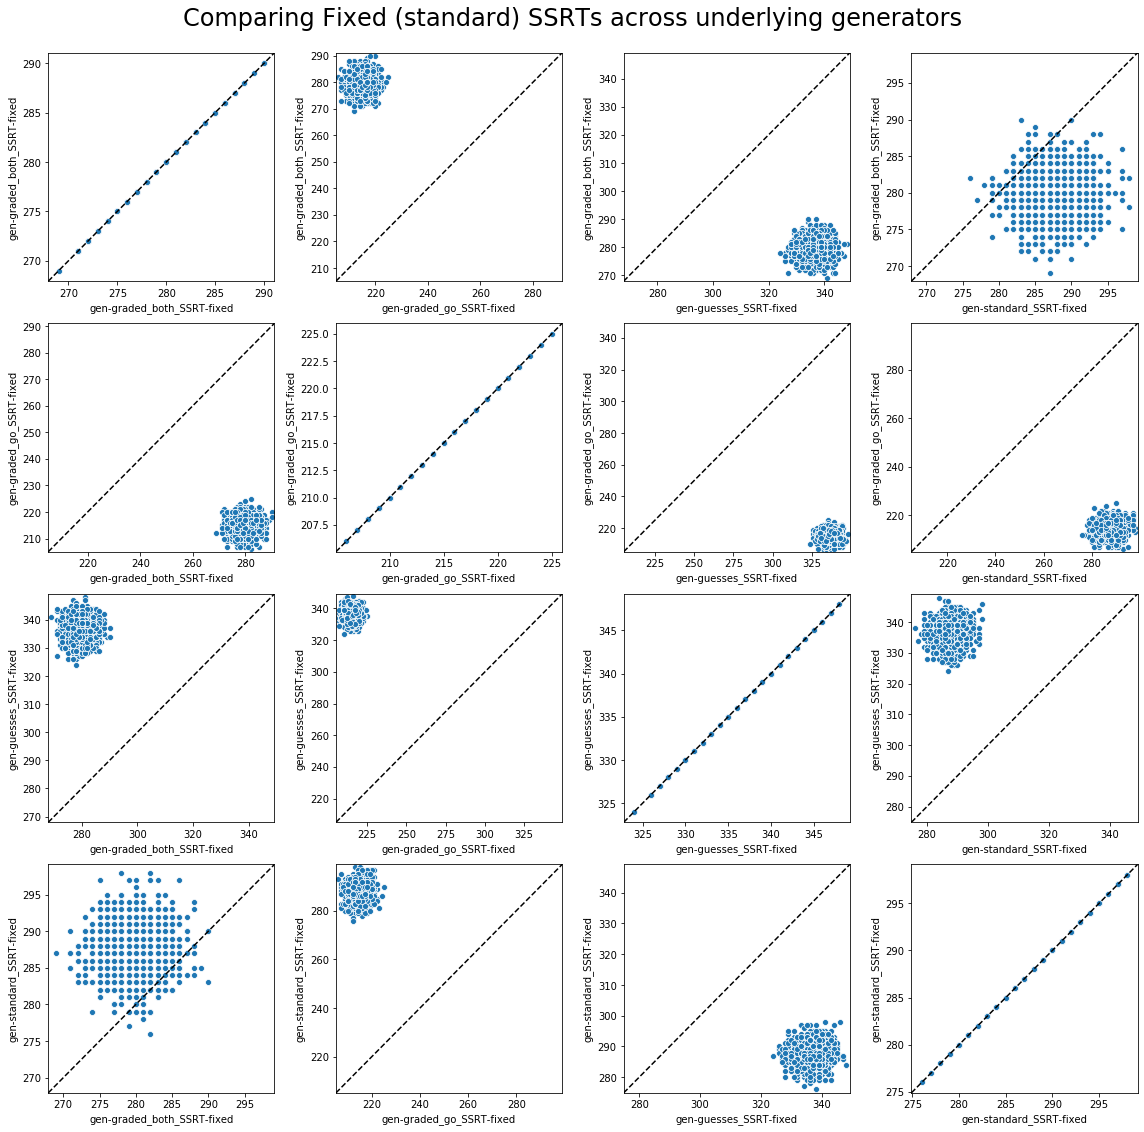

In [15]:
curr_df = monster_df.filter(regex='fixed')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Fixed (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [16]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed,gen-guesses_SSRT-fixed,gen-standard_SSRT-fixed
gen-graded_both_SSRT-fixed,1.000000,-0.002607,0.020053,0.005086
gen-graded_go_SSRT-fixed,-0.002607,1.000000,0.015443,-0.007455
gen-guesses_SSRT-fixed,0.020053,0.015443,1.000000,0.055932
gen-standard_SSRT-fixed,0.005086,-0.007455,0.055932,1.000000


## (not rescaling the axes to get a closer look)

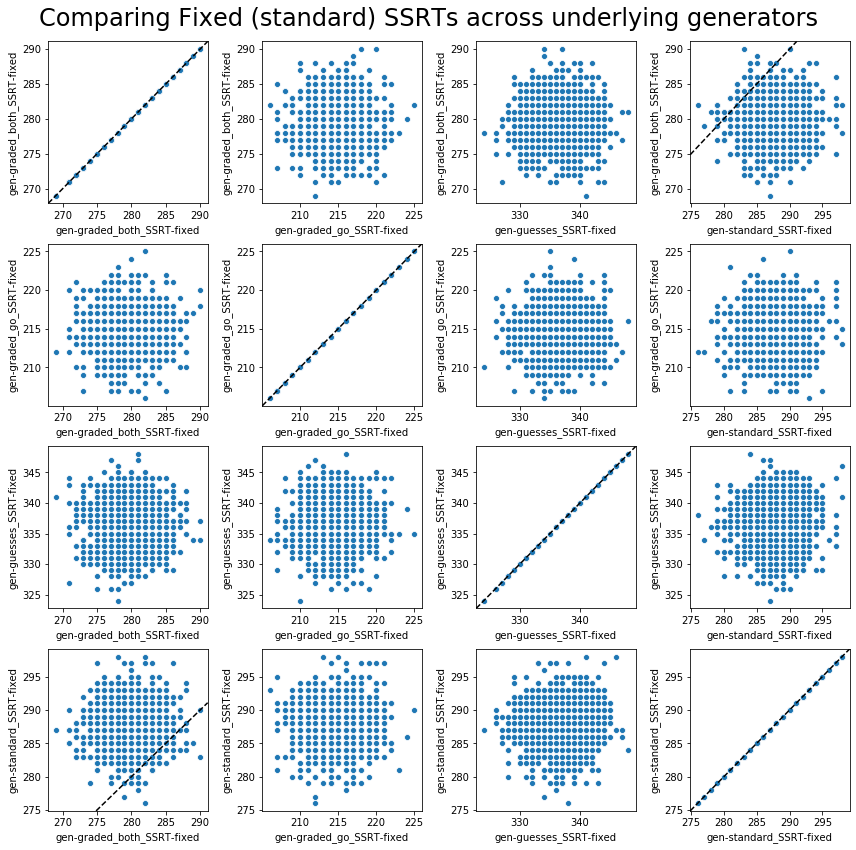

In [17]:
curr_df = monster_df.filter(regex='fixed')
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Fixed (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

# Weighted SSRTs (from randomly assigned SSD distributions)

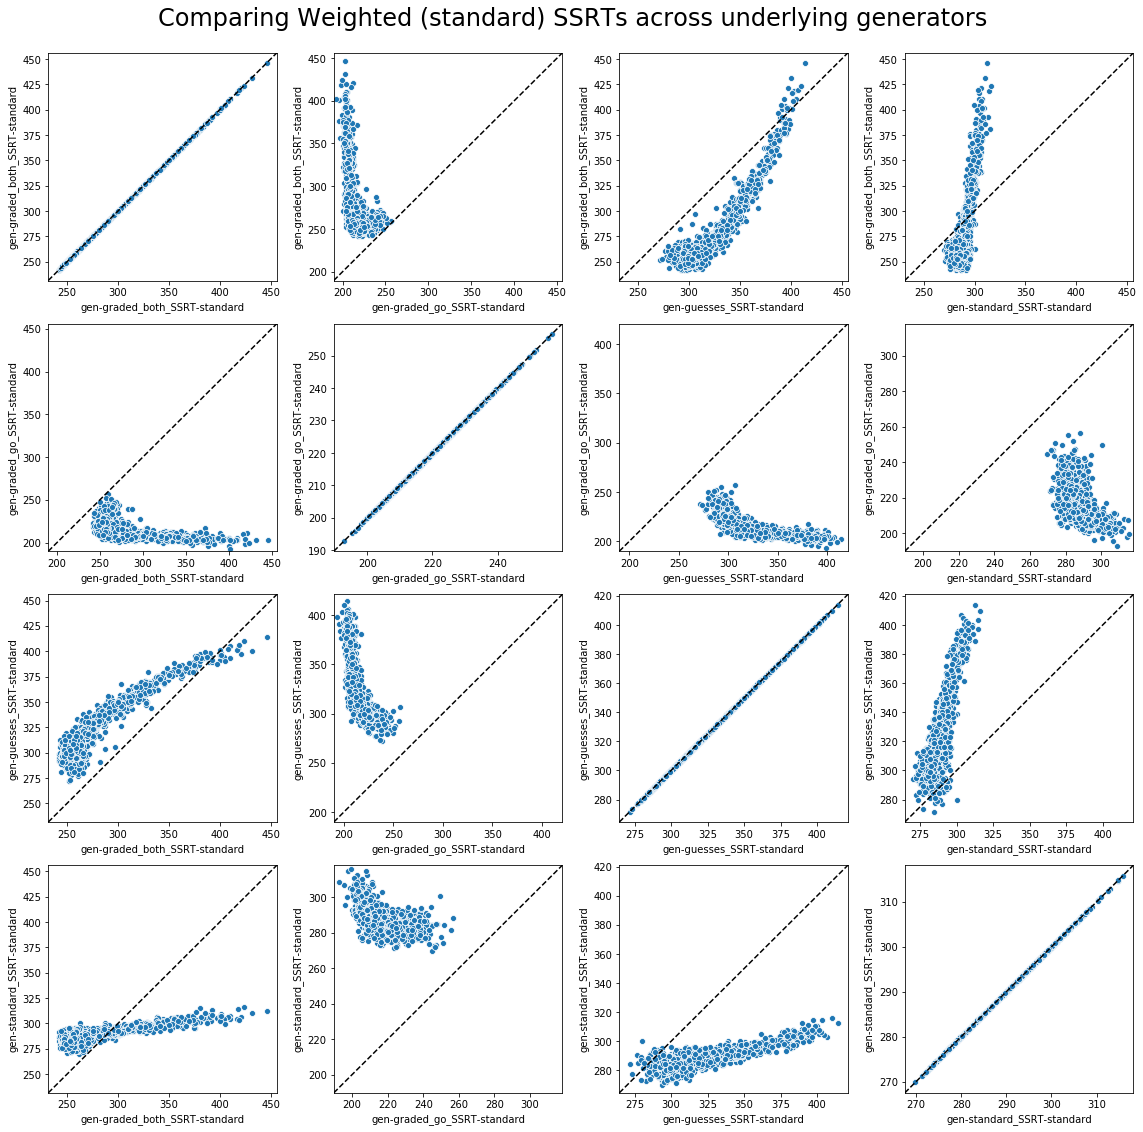

In [18]:
curr_df = monster_df.filter(regex='SSRT-standard')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Weighted (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [19]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard,gen-guesses_SSRT-standard,gen-standard_SSRT-standard
gen-graded_both_SSRT-standard,1.000000,-0.679884,0.871844,0.725582
gen-graded_go_SSRT-standard,-0.679884,1.000000,-0.839928,-0.631315
gen-guesses_SSRT-standard,0.871844,-0.839928,1.000000,0.751193
gen-standard_SSRT-standard,0.725582,-0.631315,0.751193,1.000000


## not rescaling axis to get a closer look

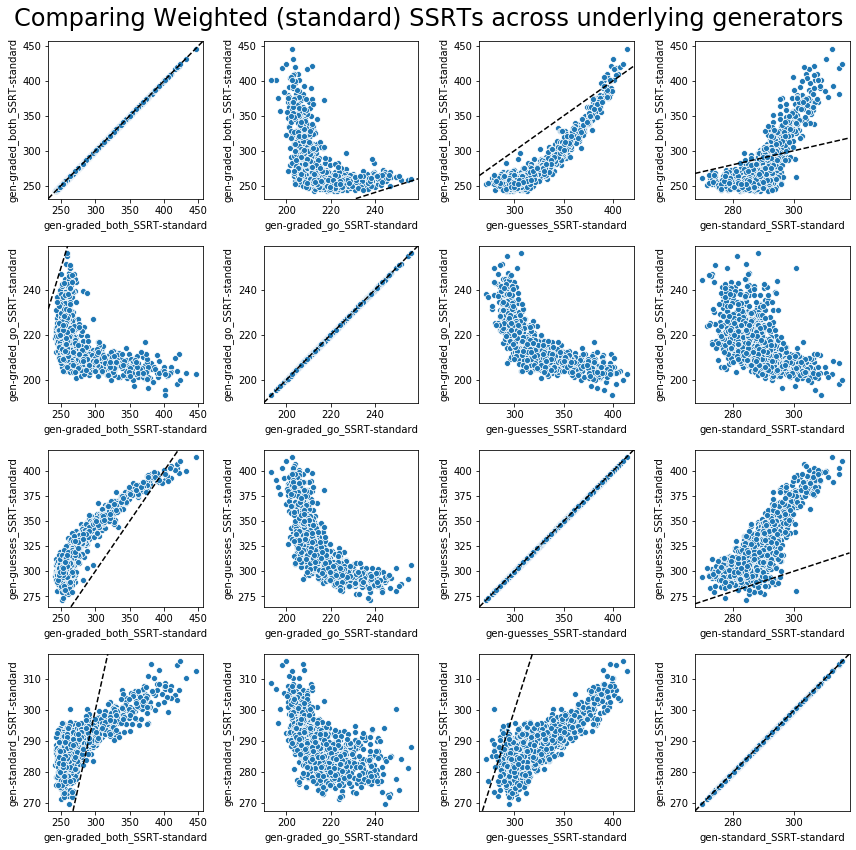

In [20]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Weighted (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

# Tracking-based SSRTs

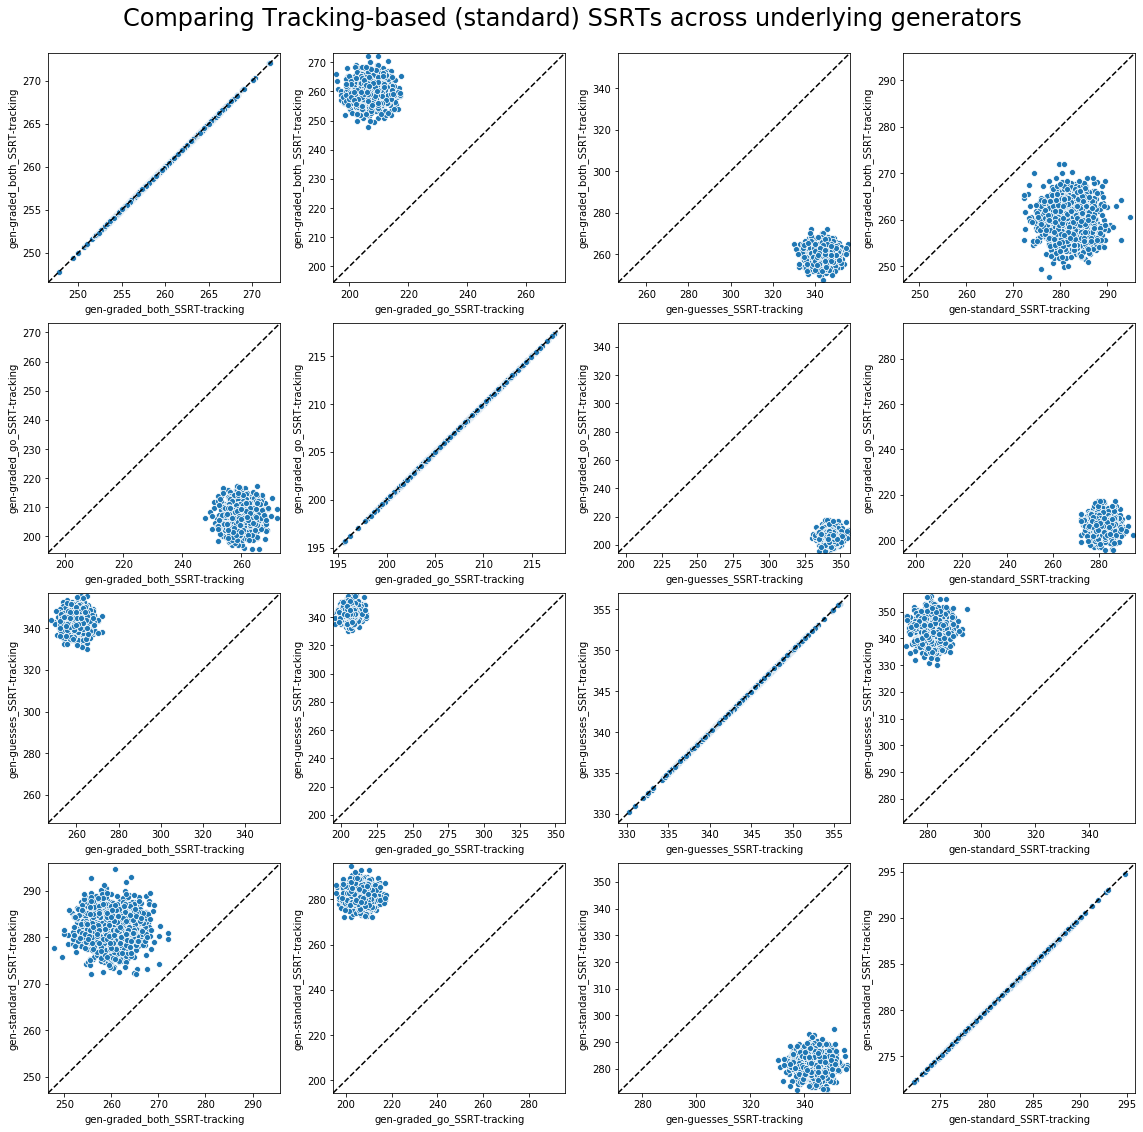

In [21]:
curr_df = monster_df.filter(regex='SSRT-tracking')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Tracking-based (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [22]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking,gen-guesses_SSRT-tracking,gen-standard_SSRT-tracking
gen-graded_both_SSRT-tracking,1.000000,0.034904,0.029462,0.016076
gen-graded_go_SSRT-tracking,0.034904,1.000000,0.012801,-0.051123
gen-guesses_SSRT-tracking,0.029462,0.012801,1.000000,-0.002295
gen-standard_SSRT-tracking,0.016076,-0.051123,-0.002295,1.000000


## not rescaling axes

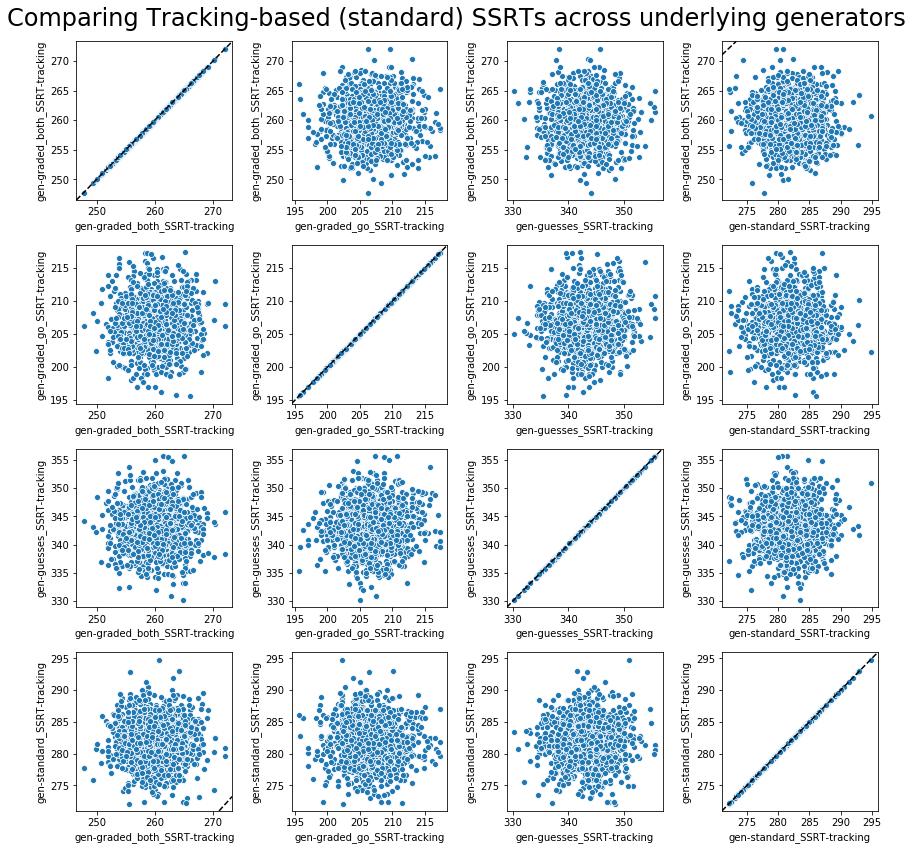

In [23]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Tracking-based (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [24]:
main_cols = ['assigned_SSRT',
             'gen-graded_both_SSRT-standard',
             'gen-graded_go_SSRT-standard',
             'gen-guesses_SSRT-standard',
             'gen-standard_SSRT-standard',
             'gen-graded_both_SSRT-fixed',
             'gen-graded_go_SSRT-fixed',
             'gen-guesses_SSRT-fixed',
             'gen-standard_SSRT-fixed',
             'gen-graded_both_SSRT-tracking',
             'gen-graded_go_SSRT-tracking',
             'gen-guesses_SSRT-tracking',
             'gen-standard_SSRT-tracking']
monster_df[main_cols].describe()

,assigned_SSRT,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard,gen-guesses_SSRT-standard,gen-standard_SSRT-standard,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed,gen-guesses_SSRT-fixed,gen-standard_SSRT-fixed,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking,gen-guesses_SSRT-tracking,gen-standard_SSRT-tracking
count,1.152000e+03,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,3.013400e+02,278.999749,215.491275,322.791077,288.523837,279.673611,214.612847,336.482639,287.728299,259.982797,206.705280,343.302512,281.958595
std,4.720053e-12,36.104350,9.969009,28.305459,7.325547,3.278458,2.885798,3.808360,3.326428,3.666401,3.518468,3.932695,3.393398
min,3.013400e+02,241.716667,192.933333,271.625000,269.806452,269.000000,206.000000,324.000000,276.000000,247.786000,195.582000,330.208000,272.162000
25%,3.013400e+02,255.145833,208.300000,301.504167,283.591667,277.000000,213.000000,334.000000,286.000000,257.489000,204.340000,340.622000,279.716000
50%,3.013400e+02,264.300000,213.100000,314.458333,288.068217,280.000000,215.000000,336.500000,288.000000,260.022000,206.572000,343.242000,281.962000
75%,3.013400e+02,290.083333,220.590537,339.969388,292.683333,282.000000,217.000000,339.000000,290.000000,262.498500,209.064000,345.811500,284.278000
max,3.013400e+02,445.933333,256.651163,413.933333,315.850000,290.000000,225.000000,348.000000,298.000000,272.038000,217.366000,355.670000,294.772000


In [25]:
df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard.1,gen-guesses_SSRT-standard.2,gen-standard_SSRT-standard.3,gen-graded_both_SSRT-guesses,gen-graded_go_SSRT-guesses.1,gen-guesses_SSRT-guesses.2,gen-standard_SSRT-guesses.3,gen-graded_both_SSRT-graded_go,gen-graded_go_SSRT-graded_go.1,...,gen-guesses_SSRT-graded_both.2,gen-standard_SSRT-graded_both.3,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed.1,gen-guesses_SSRT-fixed.2,gen-standard_SSRT-fixed.3,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking.1,gen-guesses_SSRT-tracking.2,gen-standard_SSRT-tracking.3
gen-graded_both_SSRT-standard,1.000000,-0.679884,0.871844,0.725582,0.437569,-0.859375,0.468131,-0.881625,0.909052,0.757614,...,0.886026,0.866104,0.181552,0.023412,0.005991,0.035626,-0.059818,0.003653,0.047580,-0.010046
gen-graded_go_SSRT-standard.1,-0.679884,1.000000,-0.839928,-0.631315,0.070917,0.903757,-0.464497,0.827019,-0.823542,-0.642528,...,-0.854255,-0.871614,-0.049250,0.221009,-0.050024,-0.041517,0.022418,-0.020602,-0.062461,-0.026972
gen-guesses_SSRT-standard.2,0.871844,-0.839928,1.000000,0.751193,0.138600,-0.969511,0.685178,-0.947332,0.957229,0.823732,...,0.974867,0.966337,0.048713,0.016095,0.162583,0.036610,-0.043697,0.010461,0.053762,0.002923
gen-standard_SSRT-standard.3,0.725582,-0.631315,0.751193,1.000000,0.288084,-0.757585,0.427897,-0.620433,0.752741,0.653991,...,0.759972,0.780360,0.025729,0.017134,0.044661,0.354553,-0.033609,-0.003395,0.055749,0.021848
gen-graded_both_SSRT-guesses,0.437569,0.070917,0.138600,0.288084,1.000000,-0.097476,0.126581,-0.154962,0.206738,0.121736,...,0.147756,0.124382,0.206467,0.023342,-0.034035,0.005130,-0.044996,-0.007972,-0.022331,-0.000073
gen-graded_go_SSRT-guesses.1,-0.859375,0.903757,-0.969511,-0.757585,-0.097476,1.000000,-0.536544,0.958296,-0.970254,-0.815187,...,-0.987944,-0.990583,-0.050281,0.022998,-0.047685,-0.038859,0.040718,-0.009535,-0.063810,-0.008008
gen-guesses_SSRT-guesses.2,0.468131,-0.464497,0.685178,0.427897,0.126581,-0.536544,1.000000,-0.527213,0.517451,0.464513,...,0.550404,0.530673,-0.003195,0.017126,0.534299,0.031077,-0.046299,0.003295,0.021512,0.008905
gen-standard_SSRT-guesses.3,-0.881625,0.827019,-0.947332,-0.620433,-0.154962,0.958296,-0.527213,1.000000,-0.951510,-0.819220,...,-0.961046,-0.945423,-0.060073,-0.019517,-0.036840,0.069124,0.044821,-0.007517,-0.053022,0.009438
gen-graded_both_SSRT-graded_go,0.909052,-0.823542,0.957229,0.752741,0.206738,-0.970254,0.517451,-0.951510,1.000000,0.826239,...,0.991091,0.979845,0.057535,0.009068,0.036168,0.033846,-0.043190,-0.000343,0.050187,0.004450
gen-graded_go_SSRT-graded_go.1,0.757614,-0.642528,0.823732,0.653991,0.121736,-0.815187,0.464513,-0.819220,0.826239,1.000000,...,0.839424,0.841886,0.054467,0.132749,0.060145,0.023003,-0.035990,0.005632,0.077290,0.003744


In [26]:
# monster_df[main_cols].loc[monster_df['gen-graded_both_SSRT-standard'].notnull()].to_csv('simulation_mainSSRTs_scale0.csv')
len(monster_df[main_cols].loc[monster_df['gen-graded_both_SSRT-standard'].notnull()])

1152

# Plot graded Mu Go function

In [27]:
SSDs = np.arange(0,650, 5)

simulator = SimulateData()
mu_gos = [[i, simulator._log_grade_mu(1, i)] for i in SSDs]

/Users/henrymj/Documents/ABCD_simulations/scripts/utils.py:342: RuntimeWarning: divide by zero encountered in log
  return self._at_least_0((np.log(SSD/max_SSD)/4+1) * mu_go)


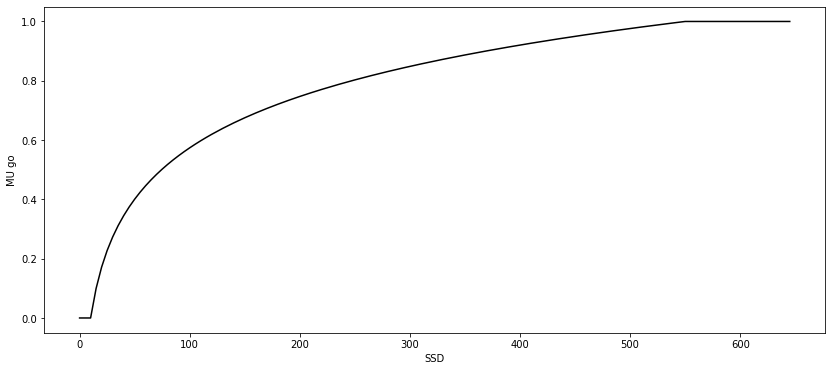

In [28]:
fig,ax = plt.subplots(1,1, figsize=(14, 6))

_ = sns.lineplot(x='SSD', y='MU go', color='k', data=pd.DataFrame(mu_gos, columns=['SSD', 'MU go']))
plt.savefig('figures/graded_mu_go_function.png')

In [29]:
monster_df.index.unique()

Index(['00J52GPG', '00LJVZK2', '00R4TXET', '028WCTG6', '029PWCFY', '030W95VP',
       '03VJZEL', '040B4TRC', '04BFG4JM', '052HU3CU',
       ...
       'ZRR4D9LW', 'ZTN5R70A', 'ZTP2ZHLN', 'ZTTGYL51', 'ZUDPGDWJ', 'ZUXHPX3N',
       'ZWWDT1TG', 'ZXF5C635', 'ZXPAWB32', 'ZYF317MG'],
      dtype='object', length=1152)